# Project 2: Bangkok Housing

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load Data

In [2]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\hp\Desktop\Truedigital\material\dsi-mymaterial\Projects\project_2\Redo


In [3]:
# Read file
train_df = pd.read_csv('../data/ridge_train_cleaned.csv')
test_df = pd.read_csv('../data/ridge_test_cleaned.csv')

## Feature Selection before Modeling

In [4]:
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                  int64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

Review features from correlation

In [5]:
train_df.corr(numeric_only=True)

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
id,1.000000,-0.013186,0.042285,0.021793,0.032886,0.015252,-0.025256,0.014318,-0.008959,-0.067998,-0.023633,-0.033172,-0.056469,-0.033953,-0.051885
total_units,-0.013186,1.000000,-0.137348,-0.139065,-0.146123,0.185082,-0.008500,0.041110,-0.046764,0.015518,0.059133,-0.043536,-0.032009,0.063418,-0.227408
bedrooms,0.042285,-0.137348,1.000000,0.847878,0.842579,-0.441218,0.007263,0.104336,0.021190,-0.490860,-0.222348,-0.391297,-0.483857,-0.647216,0.217653
baths,0.021793,-0.139065,0.847878,1.000000,0.844282,-0.409358,0.019275,0.090071,0.042933,-0.452066,-0.189913,-0.346616,-0.426937,-0.586135,0.302811
floor_area,0.032886,-0.146123,0.842579,0.844282,1.000000,-0.419549,0.053277,0.104070,0.042163,-0.451687,-0.206192,-0.348273,-0.426217,-0.645227,0.326608
floor_level,0.015252,0.185082,-0.441218,-0.409358,-0.419549,1.000000,0.000578,-0.053627,-0.070384,0.342918,0.130138,0.202730,0.277043,0.391922,0.037803
land_area,-0.025256,-0.008500,0.007263,0.019275,0.053277,0.000578,1.000000,0.014994,0.000263,0.005494,-0.013095,0.002665,-0.002302,0.022053,0.086452
latitude,0.014318,0.041110,0.104336,0.090071,0.104070,-0.053627,0.014994,1.000000,-0.426959,-0.061592,0.027975,-0.123861,-0.115709,-0.088077,-0.056349
longitude,-0.008959,-0.046764,0.021190,0.042933,0.042163,-0.070384,0.000263,-0.426959,1.000000,-0.144356,0.010083,-0.007080,-0.037255,-0.027852,0.038556
nearby_stations,-0.067998,0.015518,-0.490860,-0.452066,-0.451687,0.342918,0.005494,-0.061592,-0.144356,1.000000,0.097530,0.404547,0.563784,0.434486,0.256031


In [6]:
# train data select features
feat_num = ['floor_area', 'bedrooms', 'baths', 'floor_level', 'land_area', 'nearby_stations', 'nearby_shops', 'nearby_supermarkets', 'nearby_bus_stops']
feat_cat = ['property_type', 'subdistrict']

train_df[feat_num + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13774 entries, 0 to 13773
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   floor_area           13774 non-null  int64  
 1   bedrooms             13774 non-null  float64
 2   baths                13774 non-null  float64
 3   floor_level          13774 non-null  int64  
 4   land_area            13774 non-null  float64
 5   nearby_stations      13774 non-null  int64  
 6   nearby_shops         13774 non-null  int64  
 7   nearby_supermarkets  13774 non-null  float64
 8   nearby_bus_stops     13774 non-null  float64
 9   property_type        13774 non-null  object 
 10  subdistrict          13774 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 1.2+ MB


#### Train - dev Split

In [7]:
# Dummify
X = pd.get_dummies(train_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)
y = train_df['price']

# train/test split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.8, random_state=42)

# Modelling

## Linear Regression

In [8]:
# Standard Scaler and fit transform
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_dev_scale = ss.transform(X_dev)

In [9]:
# Instantiate the model
lr=LinearRegression()

In [10]:
# Fit the model
lr.fit(X_train_scale, y_train)

LinearRegression()

In [11]:
# Make prediction
pred_train = lr.predict(X_train_scale)
pred_dev = lr.predict(X_dev_scale)

print(mean_squared_error(y_train, pred_train, squared=False))
print(mean_squared_error(y_dev, pred_dev, squared=False))

1193671.8788744793
1257531.478191247


In [12]:
# Linear Cofficient
lr.coef_

array([ 7.68733727e+05,  4.77967835e+05,  7.65212234e+05,  1.74725799e+05,
        2.57779406e+04,  3.97665115e+05,  8.66560131e+04, -2.48605654e+03,
       -3.56636960e+04, -8.85620744e+04, -6.35849916e+05,  4.74017871e+04,
        1.73959539e+04,  2.85932077e+04, -2.70296516e+04,  4.65993083e+04,
        9.93545095e+03,  4.59575000e+04,  8.97879425e+03, -1.07383258e+04,
       -4.92759874e+04,  2.74517856e+05,  1.91563416e+04, -1.56412060e+04,
        4.63893547e+03,  7.06802497e+03,  6.98512095e+04,  2.72878864e+05,
       -1.00069140e+04,  4.34941249e+02,  3.68754287e+04,  3.16085997e+04,
        1.63421825e+05,  3.07415283e+04,  1.08806241e+05, -3.12752700e+03,
       -5.42959920e+04,  1.37068561e+04,  5.25362869e+04,  9.97474062e+03,
        3.73012256e+04,  1.50478630e+04,  1.93722118e+04,  9.83888841e+03,
        4.48570854e+03,  2.30933609e+04,  8.89193730e+04,  2.97330602e+04,
       -4.44097197e+04,  9.90734264e+03,  2.30237228e+04,  1.35438828e+03,
        1.92809262e+05,  

In [13]:
# Linear Intercept
lr.intercept_

3985997.073237136

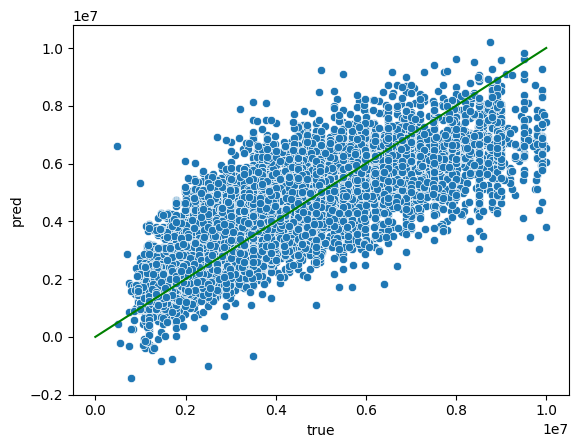

In [14]:
df_result = pd.DataFrame({'true':y_train, 'pred':pred_train})
df_result['residual'] = df_result['pred'] - df_result['true']

sns.scatterplot(y='pred', x='true', data=df_result)
plt.plot(np.linspace(0, 1e7, 100), np.linspace(0, 1e7, 100), color='green');

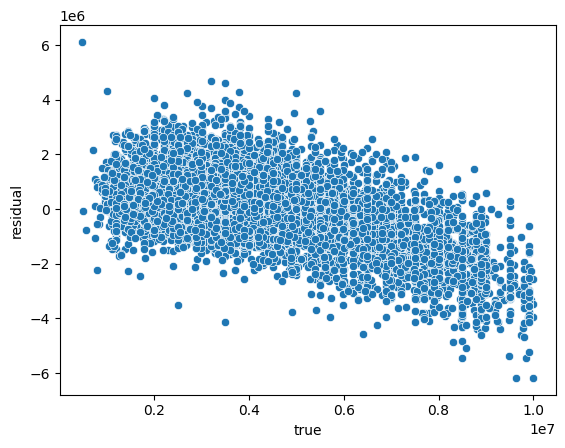

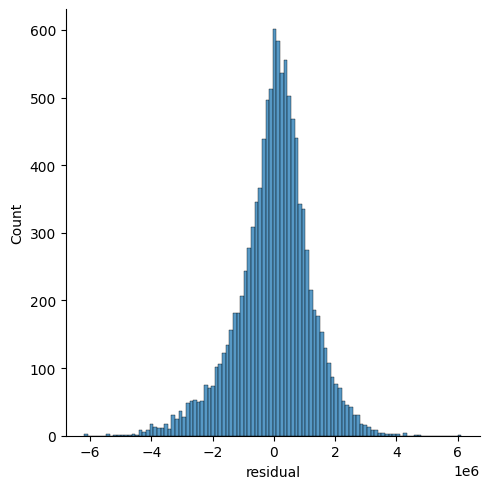

In [15]:
sns.scatterplot(x='true', y='residual', data=df_result)
sns.displot(x='residual', data=df_result);

## Ridge Regression Model (Tuning from Linear Regression)

In [16]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# Define a range of alpha values for Ridge regression
r_alphas = np.logspace(-6, 6, 13)

# Create a RidgeCV model to perform cross-validated alpha selection
ridgecv = RidgeCV(alphas=r_alphas, store_cv_values=True)

# Fit the RidgeCV model to the training data
ridgecv.fit(X_train_scale, y_train)

# prediction
pred_train = ridgecv.predict(X_train_scale)
pred_dev = ridgecv.predict(X_dev_scale)

print(mean_squared_error(y_train, pred_train, squared=False))
print(mean_squared_error(y_dev, pred_dev, squared=False))

1193745.5843308493
1258135.7899078038


In [17]:
# Calculate R2 score for training data
r2_train = r2_score(y_train, pred_train)

# Calculate R2 score for development data
r2_dev = r2_score(y_dev, pred_dev)

# Print the R2 scores
print("R-squared (R2) Score for training data:", r2_train)
print("R-squared (R2) Score for development data:", r2_dev)

R-squared (R2) Score for training data: 0.6941407098297896
R-squared (R2) Score for development data: 0.6470235619392646


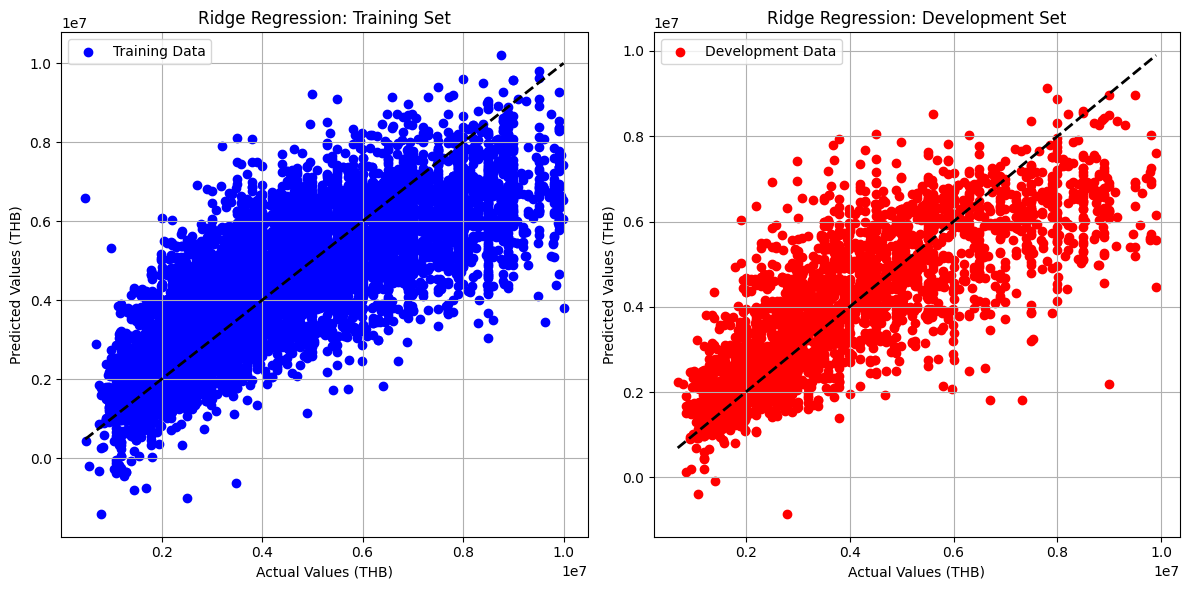

In [18]:
# Plot the results
plt.figure(figsize=(12, 6))

# Plot the predicted vs. actual values for the training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, pred_train, c='b', marker='o', label='Training Data')
plt.xlabel('Actual Values (THB)')
plt.ylabel('Predicted Values (THB)')
plt.title('Ridge Regression: Training Set')
plt.legend(loc='upper left')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', lw=2, color='k')
plt.grid(True)

# Plot the predicted vs. actual values for the development set
plt.subplot(1, 2, 2)
plt.scatter(y_dev, pred_dev, c='r', marker='o', label='Development Data')
plt.xlabel('Actual Values (THB)')
plt.ylabel('Predicted Values (THB)')
plt.title('Ridge Regression: Development Set')
plt.legend(loc='upper left')
plt.plot([min(y_dev), max(y_dev)], [min(y_dev), max(y_dev)], linestyle='--', lw=2, color='k')
plt.grid(True)

plt.tight_layout()
plt.show()

## Select Features

In [19]:
test_df.corr(numeric_only=True)

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built
id,1.000000,0.004965,0.062596,0.051951,0.061020,0.015842,0.022168,-0.001800,-0.014882,-0.104613,-0.012527,-0.039999,-0.057225,-0.052012
total_units,0.004965,1.000000,-0.120176,-0.126974,-0.127465,0.212974,-0.040082,0.031798,-0.020828,0.014225,0.061334,-0.048109,-0.055512,0.053746
bedrooms,0.062596,-0.120176,1.000000,0.839906,0.792895,-0.407246,0.077279,0.129799,-0.011650,-0.483505,-0.220065,-0.377541,-0.451796,-0.658753
baths,0.051951,-0.126974,0.839906,1.000000,0.789217,-0.388284,0.074990,0.099971,0.009584,-0.454116,-0.194053,-0.331957,-0.402571,-0.596396
floor_area,0.061020,-0.127465,0.792895,0.789217,1.000000,-0.384561,0.149005,0.095003,0.036332,-0.433207,-0.187646,-0.321229,-0.385405,-0.630426
floor_level,0.015842,0.212974,-0.407246,-0.388284,-0.384561,1.000000,0.002861,-0.039079,-0.082420,0.353957,0.148458,0.198693,0.282699,0.402744
land_area,0.022168,-0.040082,0.077279,0.074990,0.149005,0.002861,1.000000,-0.038931,0.015435,-0.005700,-0.014149,-0.016003,-0.022022,-0.014139
latitude,-0.001800,0.031798,0.129799,0.099971,0.095003,-0.039079,-0.038931,1.000000,-0.420409,-0.080219,-0.015587,-0.118744,-0.119006,-0.126449
longitude,-0.014882,-0.020828,-0.011650,0.009584,0.036332,-0.082420,0.015435,-0.420409,1.000000,-0.131849,0.025802,0.002896,-0.071987,-0.021484
nearby_stations,-0.104613,0.014225,-0.483505,-0.454116,-0.433207,0.353957,-0.005700,-0.080219,-0.131849,1.000000,0.089794,0.397072,0.547634,0.457533


In [20]:
feat_num = ['floor_area', 'bedrooms', 'baths', 'floor_level', 'land_area', 'nearby_stations', 'nearby_shops', 'nearby_supermarkets', 
            'nearby_bus_stops']
feat_cat = ['property_type', 'subdistrict']

test_df[feat_num + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   floor_area           2500 non-null   int64  
 1   bedrooms             2500 non-null   float64
 2   baths                2500 non-null   float64
 3   floor_level          2500 non-null   int64  
 4   land_area            2500 non-null   float64
 5   nearby_stations      2500 non-null   int64  
 6   nearby_shops         2500 non-null   int64  
 7   nearby_supermarkets  2500 non-null   float64
 8   nearby_bus_stops     2500 non-null   float64
 9   property_type        2500 non-null   object 
 10  subdistrict          2500 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 215.0+ KB


In [21]:
X_test_imputed = pd.get_dummies(test_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)
X_test_imputed, _ = X_test_imputed.align(X_train, join='right', axis=1, fill_value=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [22]:
X_test_imputed

,floor_area,bedrooms,baths,floor_level,land_area,nearby_stations,nearby_shops,nearby_supermarkets,nearby_bus_stops,property_type_Detached House,...,subdistrict_Thung Song Hong,subdistrict_Thung Wat Don,subdistrict_Wang Mai,subdistrict_Wang Thonglang,subdistrict_Wat Arun,subdistrict_Wat Chalo,subdistrict_Wat Phraya Krai,subdistrict_Wat Tha Phra,subdistrict_Wong Sawang,subdistrict_Yan Nawa
0,120,4.0,3.0,1,140.0,0,5,9.0,14.0,True,...,False,False,False,False,0,False,False,False,False,False
1,188,4.0,3.0,1,208.0,0,5,9.0,20.0,True,...,False,False,False,False,0,False,False,False,False,False
2,22,1.0,1.0,23,177.0,3,20,13.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
3,41,1.0,1.0,5,146.0,1,20,16.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
4,29,1.0,1.0,25,115.0,0,14,10.0,20.0,False,...,True,False,False,False,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,33,1.0,1.0,12,140.0,2,20,18.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
2496,65,1.0,1.0,33,140.0,3,20,20.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
2497,42,1.0,1.0,10,140.0,1,7,5.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
2498,28,1.0,1.0,8,140.0,1,20,13.0,19.0,False,...,False,False,False,False,0,False,False,False,False,False


In [23]:
# replace 0 by random floor 3 to 30
X_test_imputed.loc[X_test_imputed['floor_level'] == 0,['floor_level']] = np.random.randint(3,30)
X_test_imputed

,floor_area,bedrooms,baths,floor_level,land_area,nearby_stations,nearby_shops,nearby_supermarkets,nearby_bus_stops,property_type_Detached House,...,subdistrict_Thung Song Hong,subdistrict_Thung Wat Don,subdistrict_Wang Mai,subdistrict_Wang Thonglang,subdistrict_Wat Arun,subdistrict_Wat Chalo,subdistrict_Wat Phraya Krai,subdistrict_Wat Tha Phra,subdistrict_Wong Sawang,subdistrict_Yan Nawa
0,120,4.0,3.0,1,140.0,0,5,9.0,14.0,True,...,False,False,False,False,0,False,False,False,False,False
1,188,4.0,3.0,1,208.0,0,5,9.0,20.0,True,...,False,False,False,False,0,False,False,False,False,False
2,22,1.0,1.0,23,177.0,3,20,13.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
3,41,1.0,1.0,5,146.0,1,20,16.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
4,29,1.0,1.0,25,115.0,0,14,10.0,20.0,False,...,True,False,False,False,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,33,1.0,1.0,12,140.0,2,20,18.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
2496,65,1.0,1.0,33,140.0,3,20,20.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
2497,42,1.0,1.0,10,140.0,1,7,5.0,20.0,False,...,False,False,False,False,0,False,False,False,False,False
2498,28,1.0,1.0,8,140.0,1,20,13.0,19.0,False,...,False,False,False,False,0,False,False,False,False,False


In [24]:
# Transform
X_test_scale = ss.transform(X_test_imputed)
X_test_scale

array([[ 0.75958182,  2.12218084,  1.79092164, ..., -0.04573478,
        -0.06544945, -0.06331755],
       [ 1.90973941,  2.12218084,  1.79092164, ..., -0.04573478,
        -0.06544945, -0.06331755],
       [-0.89799824, -0.81431694, -0.72426642, ..., -0.04573478,
        -0.06544945, -0.06331755],
       ...,
       [-0.55971659, -0.81431694, -0.72426642, ..., -0.04573478,
        -0.06544945, -0.06331755],
       [-0.79651374, -0.81431694, -0.72426642, ..., -0.04573478,
        -0.06544945, -0.06331755],
       [-0.76268558, -0.81431694, -0.72426642, ..., -0.04573478,
        -0.06544945, -0.06331755]])

In [25]:
# Apply Ridge Regression to test data
test_predictions = ridgecv.predict(X_test_scale)
np.shape(test_predictions)

(2500,)

In [26]:
test_predictions

array([5449298.44263005, 6215076.55525671, 4795006.49830495, ...,
       2732452.54422963, 2086130.1695106 , 2618902.38899177])

In [27]:
test_df['price'] = test_predictions
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,101.000000,0,Unknown,14.0,9.0,5,2000,December,"['Clubhouse', 'Community Garden', 'CCTV', 'Pav...",5.449298e+06
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,100.341833,0,Unknown,20.0,9.0,5,2020,March,"['Car Park', 'Clubhouse', 'Community Garden', ...",6.215077e+06
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,100.566385,3,"[['BL20 Phra Ram 9 MRT', 270], ['E4 Asok BTS',...",20.0,13.0,20,2015,September,"['Covered car park', 'CCTV', 'Fitness corner',...",4.795006e+06
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,100.577202,1,"[['E6 Thong Lo BTS', 70]]",20.0,16.0,20,2013,June,"['Car Park', 'Covered car park', 'CCTV', 'Fitn...",6.122527e+06
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,100.547923,0,Unknown,20.0,10.0,14,2012,September,"['Covered car park', 'CCTV', 'Fitness corner',...",2.303433e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,100.526269,2,"[['BL27 Sam Yan MRT', 410], ['S2 Sala Daeng BT...",20.0,18.0,20,2016,September,"['Amphitheatre', 'Covered car park', 'Communit...",5.635754e+06
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,100.531092,3,"[['B1 Sathorn BRT', 180], ['B2 Arkan Songkhro ...",20.0,20.0,20,2009,July,"['Covered car park', 'CCTV', 'Fitness corner',...",6.919884e+06
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,100.492732,1,"[['BL05 Bang Yi Khan MRT', 910]]",20.0,5.0,7,2009,January,"['Car Park', 'Community Garden', 'CCTV', 'Fitn...",2.732453e+06
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,100.592954,1,"[['E15 Samrong BTS', 800]]",19.0,13.0,20,2016,December,"['Covered car park', 'CCTV', 'Fitness corner',...",2.086130e+06


In [28]:
# Create Data Frame
submission_project = pd.DataFrame(test_df[['id','price']])
submission_project

,id,price
0,10317868,5.449298e+06
1,10885829,6.215077e+06
2,10765951,4.795006e+06
3,10003549,6.122527e+06
4,10663026,2.303433e+06
...,...,...
2495,10889363,5.635754e+06
2496,10975839,6.919884e+06
2497,10986832,2.732453e+06
2498,10687627,2.086130e+06


In [29]:
# Save File Submission
submission_project.to_csv('../data/ridge_submission_model.csv', index=False)

In [30]:
# To answer problem statement
# Find price prediction from 1.5 million to 3.5 million Thai Baht
test_df[(test_df['price'] >= 1500000) & (test_df['price'] <= 3500000)].sort_values(by='price', ascending=True)

# answer: this table shows the property which price prediction from 1.5 million to 3.5 million Thai Baht which is the price range that the potential clients want to buy.
# For example, the property which is in Ram Inthra subdistrict, Bangkok, the price is 1,500,000 Thai Baht.

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
451,10790133,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,22,...,100.662117,0,Unknown,20.0,19.0,13,2012,December,"['Car Park', 'Covered car park', 'CCTV', 'Gymn...",1.502991e+06
259,10786218,Bangkok,Bang Kapi,Khlong Chan,Soi Ladprao 101 Ladprao Road,Condo,712.0,1.0,1.0,22,...,100.627796,0,Unknown,14.0,14.0,4,2014,June,"['Car Park', 'CCTV', 'Gymnasium room', 'Lift l...",1.508758e+06
1766,10235318,Nonthaburi,Mueang Nonthaburi,Bang Khen,"117 Soi Sombatthep, Prachachuen Road",Condo,206.0,1.0,1.0,27,...,100.545120,0,Unknown,20.0,15.0,20,2015,November,"['Covered car park', 'CCTV', 'Fitness corner',...",1.509010e+06
362,10841603,Nonthaburi,Mueang Nonthaburi,Bang Khen,Ngamwongwan Road,Condo,800.0,1.0,1.0,30,...,100.535959,0,Unknown,16.0,10.0,20,2022,December,"['Basketball court', 'BBQ pits', 'CCTV', 'Fitn...",1.509664e+06
1249,11034057,Bangkok,Bueng Kum,Khlong Kum,Nawamin Road,Condo,1831.0,1.0,1.0,23,...,100.652205,0,Unknown,20.0,13.0,7,2015,December,"['Car Park', 'Community Garden', 'CCTV', 'Eate...",1.511024e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,11006491,Bangkok,Huai Khwang,Sam Sen Nok,558 Ratchadaphisek Road,Condo,881.0,1.0,1.0,46,...,100.575856,2,"[['BL16 Ratchadaphisek MRT', 100], ['BL15 Lat ...",20.0,9.0,8,2011,June,"['Car Park', 'Covered car park', 'CCTV', 'Fitn...",3.478315e+06
1987,10059587,Bangkok,Chatuchak,Lat Yao,2999 ถนนพหลโยธิน แขวงลาดยาว เขตจตุจักร กทม.,Condo,900.0,1.0,1.0,27,...,100.584884,2,"[['N15 Bang Bua BTS', 210], ['N14 Royal Forest...",4.0,8.0,2,2019,October,"['Covered car park', 'Club', 'Clubhouse', 'CCT...",3.482328e+06
2233,10648776,Nonthaburi,Mueang Nonthaburi,Bang Kraso,557 Nonthaburi Road,Condo,1796.0,2.0,2.0,73,...,100.485706,0,Unknown,14.0,2.0,4,2016,January,"['Car Park', 'Covered car park', 'Clubhouse', ...",3.484226e+06
325,10452253,Nonthaburi,Mueang Nonthaburi,Bang Khen,พิบูลสงคราม,Townhouse,899.5,3.0,2.0,130,...,100.494129,1,"[['PP09 Yaek Nonthaburi 1 MRT', 10]]",8.0,6.0,15,2000,November,"['Covered car park', '24 hours security']",3.485708e+06


In [31]:
# Company is looking for property near station, for example, BTS, MRT, ART, and other skytrain stations.
# Find property near station
test_df[test_df['nearby_station_distance'] != 'Unknown'].sort_values(by='nearby_station_distance', ascending=True)


,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
1266,7595441,Bangkok,Lat Krabang,Khlong Sam Prawet,Rom Klao Road,Condo,1019.0,1.0,1.0,36,...,100.746544,1,"[['A2 Lat Krabang Airport Link', 390]]",20.0,4.0,2,2012,September,"['Car Park', 'CCTV', 'Fitness corner', 'Gymnas...",1.113214e+06
1053,8684469,Bangkok,Lat Krabang,Khlong Sam Prawet,Rom Klao Road,Condo,1019.0,2.0,1.0,40,...,100.746544,1,"[['A2 Lat Krabang Airport Link', 390]]",20.0,4.0,2,2012,September,"['Car Park', 'CCTV', 'Fitness corner', 'Gymnas...",1.673638e+06
197,9029282,Bangkok,Lat Krabang,Khlong Sam Prawet,Rom Klao Road,Condo,1019.0,2.0,1.0,40,...,100.746544,1,"[['A2 Lat Krabang Airport Link', 390]]",18.0,4.0,2,2012,September,"['Car Park', 'CCTV', 'Fitness corner', 'Gymnas...",1.717563e+06
561,8202873,Bangkok,Lat Krabang,Khlong Sam Prawet,Rom Klao Road,Condo,1019.0,1.0,1.0,38,...,100.746544,1,"[['A2 Lat Krabang Airport Link', 390]]",20.0,4.0,2,2012,September,"['Car Park', 'CCTV', 'Fitness corner', 'Gymnas...",1.242997e+06
494,7846347,Bangkok,Lat Krabang,Khlong Sam Prawet,Rom Klao Road,Condo,1019.0,1.0,1.0,28,...,100.746544,1,"[['A2 Lat Krabang Airport Link', 390]]",16.0,4.0,2,2012,September,"['Car Park', 'CCTV', 'Fitness corner', 'Gymnas...",1.058911e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,10992130,Bangkok,Thon Buri,Bukkhalo,99 Ratchaphruek Road,Condo,268.0,2.0,2.0,68,...,100.483624,3,"[['S9 Pho Nimit BTS', 300], ['B12 Ratchaphruek...",6.0,9.0,20,2011,July,"['Car Park', 'Community Garden', 'CCTV', 'Fitn...",5.051865e+06
1079,10300729,Bangkok,Thon Buri,Bang Yi Ruea,219 Inthara Phithak Road,Condo,387.0,1.0,1.0,28,...,100.487623,1,"[['S9 Pho Nimit BTS', 900]]",20.0,20.0,14,2016,February,"['Car Park', 'Covered car park', ""Children's P...",9.788530e+05
2385,10736521,Bangkok,Pathum Wan,Wang Mai,"60 Soi Kasem San 2, Rama 1 Road",Condo,303.0,1.0,1.0,52,...,100.528281,3,"[['W1 National Stadium BTS', 180], ['N1 Ratcha...",15.0,20.0,20,2011,July,"['Covered car park', 'CCTV', 'Fitness corner',...",5.870975e+06
551,10942747,Bangkok,Pathum Wan,Wang Mai,"60 Soi Kasem San 2, Rama 1 Road",Condo,303.0,1.0,1.0,52,...,100.528281,3,"[['W1 National Stadium BTS', 180], ['N1 Ratcha...",11.0,20.0,20,2011,July,"['Covered car park', 'CCTV', 'Fitness corner',...",5.787803e+06


In [32]:
# To focus more on the property near station, I found the property which is near station and price prediction from 1.5 million to 3.5 million Thai Baht
test_df[(test_df['nearby_station_distance'] != 'Unknown') & (test_df['price'] >= 1500000) & (test_df['price'] <= 3500000)].sort_values(by='price', ascending=True)

# answer: the cheapest price is approximate 1.5 million Thai Baht in Nonthaburi where near MRT: Phra Nang Klao Bridge Station

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
1375,10854022,Nonthaburi,Mueang Nonthaburi,Bang Kraso,Rattanathibet,Condo,570.0,1.0,1.0,31,...,100.485299,1,"[['PP08 Phra Nang Klao Bridge MRT', 570]]",18.0,4.0,3,2014,December,"['CCTV', 'Fitness corner', '24 hours security'...",1.551685e+06
1791,10713412,Nonthaburi,Mueang Nonthaburi,Talat Khwan,ติวานนท์ ติวานนท์,Condo,166.0,1.0,1.0,33,...,100.509704,1,"[['PP12 Ministry of Public Health MRT', 570]]",12.0,9.0,8,2013,August,"['Covered car park', 'CCTV', 'Fitness corner',...",1.565209e+06
748,11011093,Nonthaburi,Mueang Nonthaburi,Bang Kraso,Sanam Bin Nam Road,Condo,587.0,1.0,1.0,30,...,100.479060,1,"[['PP08 Phra Nang Klao Bridge MRT', 530]]",14.0,3.0,2,2018,January,"['Car Park', 'Covered car park', 'CCTV', 'Fitn...",1.568639e+06
441,11025719,Nonthaburi,Mueang Nonthaburi,Bang Kraso,Rattanathibet,Condo,570.0,1.0,1.0,31,...,100.485299,1,"[['PP08 Phra Nang Klao Bridge MRT', 570]]",12.0,4.0,4,2014,December,"['CCTV', 'Fitness corner', '24 hours security'...",1.575010e+06
1192,8494902,Samut Prakan,Mueang Samut Prakan,Thai Ban Mai,พุทธรักษา,Condo,982.0,1.0,1.0,24,...,100.613762,2,"[['E21 Praek Sa BTS', 630], ['E20 Srinagarindr...",9.0,5.0,6,2017,January,"['Covered car park', 'CCTV', 'Fitness corner',...",1.588146e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,8302590,Bangkok,Bang Na,Bang Na,"1 Soi Piyibut 1, Sukhumvit Road",Condo,673.0,1.0,1.0,49,...,100.612099,2,"[['E11 Punnawithi BTS', 760], ['E12 Udom Suk B...",5.0,14.0,17,2018,January,"['Car Park', 'Community Garden', 'CCTV', 'Fitn...",3.460095e+06
2186,11006491,Bangkok,Huai Khwang,Sam Sen Nok,558 Ratchadaphisek Road,Condo,881.0,1.0,1.0,46,...,100.575856,2,"[['BL16 Ratchadaphisek MRT', 100], ['BL15 Lat ...",20.0,9.0,8,2011,June,"['Car Park', 'Covered car park', 'CCTV', 'Fitn...",3.478315e+06
1987,10059587,Bangkok,Chatuchak,Lat Yao,2999 ถนนพหลโยธิน แขวงลาดยาว เขตจตุจักร กทม.,Condo,900.0,1.0,1.0,27,...,100.584884,2,"[['N15 Bang Bua BTS', 210], ['N14 Royal Forest...",4.0,8.0,2,2019,October,"['Covered car park', 'Club', 'Clubhouse', 'CCT...",3.482328e+06
325,10452253,Nonthaburi,Mueang Nonthaburi,Bang Khen,พิบูลสงคราม,Townhouse,899.5,3.0,2.0,130,...,100.494129,1,"[['PP09 Yaek Nonthaburi 1 MRT', 10]]",8.0,6.0,15,2000,November,"['Covered car park', '24 hours security']",3.485708e+06


In [33]:
# Where is the most price sensitivity? and where is the least?
# Find the highest price sensitivity and the least price sensitivity near station
test_df[test_df['nearby_station_distance'] != 'Unknown'].sort_values(by='price', ascending=False)

# answer: the highest price sensitivity is in subdistrict: Bangsue where near MRT: Bang Pho Station is approximately 11.8 million Thai Baht

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
2434,10707811,Bangkok,Bang Sue,Bang Sue,"123,149,155 ประชาราษฎร์ สาย 1 แยก19",Detached House,595.5,10.0,4.0,240,...,100.519641,1,"[['BL09 Bang Pho MRT', 270]]",19.0,9.0,3,2000,March,[],1.181467e+07
1059,10925585,Bangkok,Chatuchak,Lat Yao,งามวงศ์วาน,Detached House,938.0,4.0,2.0,360,...,100.557741,2,"[['RN03 SRT Wat Samian Nari', 40], ['RN04 SRT ...",20.0,7.0,12,2000,May,[],9.971201e+06
898,10642918,Bangkok,Chatuchak,Lat Yao,Lat Yao,Detached House,425.5,5.0,3.0,190,...,100.565187,2,"[['RN03 SRT Wat Samian Nari', 790], ['RN04 SRT...",20.0,7.0,14,2000,May,['Covered car park'],9.236181e+06
797,11006127,Bangkok,Watthana,Khlong Toei Nuea,Soi Sukhumvit 15,Condo,500.0,2.0,2.0,101,...,100.558252,3,"[['E3 Nana BTS', 380], ['BL22 Sukhumvit MRT', ...",20.0,12.0,20,2013,January,"['Car Park', 'Clubhouse', 'CCTV', 'Fitness cor...",9.176276e+06
169,10976761,Bangkok,Watthana,Khlong Toei Nuea,24 Sukhumvit Road,Condo,228.0,2.0,2.0,100,...,100.562196,3,"[['BL22 Sukhumvit MRT', 170], ['E3 Nana BTS', ...",17.0,13.0,20,1996,March,"['Covered car park', 'CCTV', 'Fitness corner',...",8.766560e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,10942637,Nonthaburi,Bang Bua Thong,Bang Rak Phatthana,Janthongeam Road,Condo,1870.0,1.0,1.0,23,...,100.405623,1,"[['PP01 Khlong Bang Phai MRT', 370]]",20.0,9.0,13,2015,December,"['Covered car park', 'Community Garden', 'CCTV...",1.012891e+06
1837,10717774,Nonthaburi,Bang Bua Thong,Bang Rak Phatthana,Janthongeam Road,Condo,1870.0,1.0,1.0,24,...,100.405623,1,"[['PP01 Khlong Bang Phai MRT', 370]]",20.0,9.0,13,2015,December,"['Covered car park', 'Community Garden', 'CCTV...",1.010329e+06
1079,10300729,Bangkok,Thon Buri,Bang Yi Ruea,219 Inthara Phithak Road,Condo,387.0,1.0,1.0,28,...,100.487623,1,"[['S9 Pho Nimit BTS', 900]]",20.0,20.0,14,2016,February,"['Car Park', 'Covered car park', ""Children's P...",9.788530e+05
2304,11007485,Nonthaburi,Bang Bua Thong,Bang Rak Phatthana,Janthongeam Road,Condo,1870.0,1.0,1.0,24,...,100.405623,1,"[['PP01 Khlong Bang Phai MRT', 370]]",15.0,9.0,13,2015,December,"['Covered car park', 'Community Garden', 'CCTV...",9.265360e+05


In [34]:
# answer: the lowest price sensitivity is in subdistrict: Bangwa where near MRT: Phetksem 48 Station is approximately 260,000 Thai Baht
test_df[test_df['nearby_station_distance'] != 'Unknown'].sort_values(by='price', ascending=True)

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
2289,10833515,Bangkok,Phasi Charoen,Bang Wa,Kanlapaphruek Road,Townhouse,321.0,1.0,1.0,42,...,100.450948,1,"[['BL35 Phetkasem 48 MRT', 920]]",15.0,5.0,8,2012,February,"['Clubhouse', 'Community Garden', 'CCTV', 'Fit...",2.692362e+05
2304,11007485,Nonthaburi,Bang Bua Thong,Bang Rak Phatthana,Janthongeam Road,Condo,1870.0,1.0,1.0,24,...,100.405623,1,"[['PP01 Khlong Bang Phai MRT', 370]]",15.0,9.0,13,2015,December,"['Covered car park', 'Community Garden', 'CCTV...",9.265360e+05
1079,10300729,Bangkok,Thon Buri,Bang Yi Ruea,219 Inthara Phithak Road,Condo,387.0,1.0,1.0,28,...,100.487623,1,"[['S9 Pho Nimit BTS', 900]]",20.0,20.0,14,2016,February,"['Car Park', 'Covered car park', ""Children's P...",9.788530e+05
1837,10717774,Nonthaburi,Bang Bua Thong,Bang Rak Phatthana,Janthongeam Road,Condo,1870.0,1.0,1.0,24,...,100.405623,1,"[['PP01 Khlong Bang Phai MRT', 370]]",20.0,9.0,13,2015,December,"['Covered car park', 'Community Garden', 'CCTV...",1.010329e+06
1002,10942637,Nonthaburi,Bang Bua Thong,Bang Rak Phatthana,Janthongeam Road,Condo,1870.0,1.0,1.0,23,...,100.405623,1,"[['PP01 Khlong Bang Phai MRT', 370]]",20.0,9.0,13,2015,December,"['Covered car park', 'Community Garden', 'CCTV...",1.012891e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,10976761,Bangkok,Watthana,Khlong Toei Nuea,24 Sukhumvit Road,Condo,228.0,2.0,2.0,100,...,100.562196,3,"[['BL22 Sukhumvit MRT', 170], ['E3 Nana BTS', ...",17.0,13.0,20,1996,March,"['Covered car park', 'CCTV', 'Fitness corner',...",8.766560e+06
797,11006127,Bangkok,Watthana,Khlong Toei Nuea,Soi Sukhumvit 15,Condo,500.0,2.0,2.0,101,...,100.558252,3,"[['E3 Nana BTS', 380], ['BL22 Sukhumvit MRT', ...",20.0,12.0,20,2013,January,"['Car Park', 'Clubhouse', 'CCTV', 'Fitness cor...",9.176276e+06
898,10642918,Bangkok,Chatuchak,Lat Yao,Lat Yao,Detached House,425.5,5.0,3.0,190,...,100.565187,2,"[['RN03 SRT Wat Samian Nari', 790], ['RN04 SRT...",20.0,7.0,14,2000,May,['Covered car park'],9.236181e+06
1059,10925585,Bangkok,Chatuchak,Lat Yao,งามวงศ์วาน,Detached House,938.0,4.0,2.0,360,...,100.557741,2,"[['RN03 SRT Wat Samian Nari', 40], ['RN04 SRT ...",20.0,7.0,12,2000,May,[],9.971201e+06
